In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Amaan Shaikh/Downloads/all_tickets_processed_improved_v3.csv")

In [3]:
df

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous
...,...,...
47832,git space for a project issues with adding use...,Access
47833,error sent july error hi guys can you help out...,Miscellaneous
47834,connection issues sent tuesday july connection...,Hardware
47835,error cube reports sent tuesday july error hel...,HR Support


In [4]:
target_per_class = 2500
balanced_df = (
    df.groupby('Topic_group')
      .apply(lambda x: x.sample(n=min(len(x), target_per_class), random_state=42))
      .reset_index(drop=True)
)

C:\Users\Amaan Shaikh\AppData\Local\Temp\ipykernel_23556\3109284179.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), target_per_class), random_state=42))


In [5]:
balanced_df

,Document,Topic_group
0,confluence access for wednesday february pm co...,Access
1,password reset open access dear can you please...,Access
2,access for tuesday hi please create once user ...,Access
3,your password expire days friday october pm ex...,Access
4,confluence access thursday pm confluence hi pl...,Access
...,...,...
18838,folder on friday folder hello right folder aut...,Storage
18839,restrict access to folder on sent friday octob...,Storage
18840,low hard drive capacity low hard drive hi exte...,Storage
18841,full mailbox sent tuesday re mailbox full impo...,Storage


In [102]:
y=balanced_df["Topic_group"]

In [7]:
corpus=[]


In [8]:
from nltk.stem import WordNetLemmatizer

In [9]:
lem=WordNetLemmatizer()

In [10]:
import nltk 
from nltk.corpus import stopwords

In [11]:
for i in range(0,len(balanced_df)):
    review=balanced_df["Document"][i]
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(word) for word in review if word not in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)

In [12]:
corpus

['confluence access wednesday february pm confluence please confluence thanks',
 'password reset open access dear please help right laptop order reset password going expire day mention working remote location around december st also issue connecting open due right restriction think could fix somehow best regard',
 'access tuesday hi please create user created add thank head analysis',
 'password expire day friday october pm expire day hi please per thank friday october pm expire day hi work around wait update thanks commercial change street manchester mob october expire day hi confluence ask change automated reminder let good moment make regard friday october pm expire day importance high hi relates thanks commercial change street manchester mob october expire day importance high dear expire day change pc press ctrl alt delete choose change thanks ext originated please detailed disclaimer automatically added gateway comply requirement arrived via cautious origin content reply contain s

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tf=TfidfVectorizer(ngram_range=(1,2), max_features=10000)

In [15]:
X=tf.fit_transform(corpus).toarray()

In [16]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
y=y.map({"Access":0,"Administrative rights":1,"HR Support":2,"Hardware":3,"Internal Project":4,"Miscellaneous":5,"Purchase":6,"Storage":7})


In [104]:
y


0        0
1        0
2        0
3        0
4        0
        ..
18838    7
18839    7
18840    7
18841    7
18842    7
Name: Topic_group, Length: 18843, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape

(15074, 10000)

In [22]:
y_train.shape

(15074,)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf=RandomForestClassifier(class_weight="balanced")

In [25]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [26]:
from sklearn.metrics import classification_report

In [27]:
ypred=rf.predict(x_test)

In [28]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       487
           1       0.85      0.81      0.83       354
           2       0.84      0.78      0.81       520
           3       0.69      0.72      0.70       526
           4       0.85      0.92      0.89       412
           5       0.79      0.78      0.78       521
           6       0.95      0.92      0.93       481
           7       0.93      0.95      0.94       468

    accuracy                           0.84      3769
   macro avg       0.85      0.85      0.85      3769
weighted avg       0.84      0.84      0.84      3769



In [29]:
test_sentences = [
    "Laptop screen is flickering badly",                      # Hardware
    "Need admin rights to install software",                  # Administrative rights
    "Please help with salary related issue",                  # HR Support
    "Requesting external SSD for faster backups",             # Purchase or Storage
    "My email access has been revoked",                       # Access
    "This issue is for internal testing only",                # Internal Project
    "Unable to find printer on the network",                  # Miscellaneous
]

In [30]:
test_corpus=[]

In [31]:
for i in range(0,len(test_sentences)):
    review=test_sentences[i]
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(word) for word in review if word not in stopwords.words("english")]
    review=" ".join(review)
    test_corpus.append(review)

In [32]:
test_corpus

['laptop screen flickering badly',
 'need admin right install software',
 'please help salary related issue',
 'requesting external ssd faster backup',
 'email access revoked',
 'issue internal testing',
 'unable find printer network']

In [33]:
test_vector=tf.transform(test_corpus).toarray()

In [34]:
test_vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
ypred1=rf.predict(test_vector)

In [36]:
print(ypred1)

[3 1 3 3 2 1 3]


In [37]:
y=y.map({"Access":0,"Administrative rights":1,"HR Support":2,"Hardware":3,"Internal Project":4,"Miscellaneous":5,"Purchase":6,"Storage":7})


In [38]:
from xgboost import XGBClassifier

In [39]:
xg=XGBClassifier()

In [40]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
ypred2=xg.predict(x_test)
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       487
           1       0.89      0.83      0.86       354
           2       0.84      0.81      0.82       520
           3       0.70      0.74      0.72       526
           4       0.91      0.92      0.91       412
           5       0.82      0.81      0.81       521
           6       0.94      0.94      0.94       481
           7       0.93      0.95      0.94       468

    accuracy                           0.86      3769
   macro avg       0.86      0.86      0.86      3769
weighted avg       0.86      0.86      0.86      3769



In [42]:
ypred3=xg.predict(test_vector)
ypred3

array([3, 1, 1, 3, 3, 1, 3], dtype=int64)

In [43]:
label_map = {
    0: "Access",
    1: "Administrative rights",
    2: "HR Support",
    3: "Hardware",
    4: "Internal Project",
    5: "Miscellaneous",
    6: "Purchase",
    7: "Storage"
}

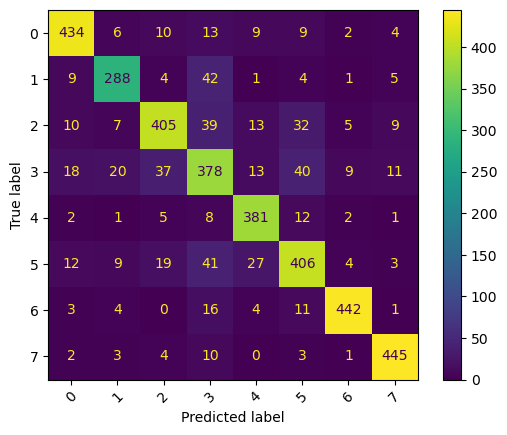

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_map.keys())
disp.plot(xticks_rotation=45)

In [53]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [90]:
sentences = balanced_df['Document'].apply(lambda x: simple_preprocess(str(x)))

In [91]:
sentences

0        [confluence, access, for, wednesday, february,...
1        [password, reset, open, access, dear, can, you...
2        [access, for, tuesday, hi, please, create, onc...
3        [your, password, expire, days, friday, october...
4        [confluence, access, thursday, pm, confluence,...
                               ...                        
18838    [folder, on, friday, folder, hello, right, fol...
18839    [restrict, access, to, folder, on, sent, frida...
18840    [low, hard, drive, capacity, low, hard, drive,...
18841    [full, mailbox, sent, tuesday, re, mailbox, fu...
18842    [increase, mailbox, size, contacted, her, mail...
Name: Document, Length: 18843, dtype: object

In [92]:
word2vec=Word2Vec(sentences,vector_size=300, window=5, min_count=1, workers=4)

In [94]:
def get_vector(sentence):
    words = simple_preprocess(str(sentence))
    valid_words = [w for w in words if w in word2vec.wv]
    if not valid_words:
        return np.zeros(300)
    return np.mean([word2vec.wv[w] for w in valid_words], axis=0)

In [96]:
reshape = balanced_df['Document'].apply(get_vector)
reshape = pd.DataFrame(reshape.tolist())

In [106]:
x_train_word,x_test_word,y_train_word,y_test_word=train_test_split(reshape,y,test_size=0.2,random_state=42)

In [107]:
rf_word=RandomForestClassifier(class_weight="balanced")

In [109]:
rf_word.fit(x_train_word,y_train_word)

RandomForestClassifier(class_weight='balanced')

In [110]:
ypred_word=rf_word.predict(x_test_word)
print(classification_report(y_test_word,ypred_word))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67       487
           1       0.73      0.68      0.70       354
           2       0.72      0.69      0.71       520
           3       0.54      0.66      0.60       526
           4       0.80      0.75      0.78       412
           5       0.64      0.67      0.65       521
           6       0.96      0.89      0.92       481
           7       0.83      0.84      0.83       468

    accuracy                           0.73      3769
   macro avg       0.74      0.73      0.73      3769
weighted avg       0.74      0.73      0.73      3769



In [111]:
test_sentences_words = [
    "Laptop screen is flickering badly",                      # Hardware
    "Need admin rights to install software",                  # Administrative rights
    "Please help with salary related issue",                  # HR Support
    "Requesting external SSD for faster backups",             # Purchase or Storage
    "My email access has been revoked",                       # Access
    "This issue is for internal testing only",                # Internal Project
    "Unable to find printer on the network",                  # Miscellaneous
]

In [113]:
test_vector_word = [get_vector(sentence) for sentence in test_sentences_words]

In [114]:
test_vector_word

[array([-1.98093936e-01,  1.21501029e-01,  1.50166750e-02,  1.60443053e-01,
         2.38985017e-01, -5.20645738e-01,  1.35114402e-01,  3.48282635e-01,
        -3.70898768e-02,  1.02681518e-01, -6.93211034e-02, -3.08706075e-01,
        -1.19935930e-01,  7.75088072e-02,  1.05056493e-02,  1.37731567e-01,
         1.98869497e-01,  3.03402156e-01, -3.60258162e-01, -3.41223329e-01,
         1.34091794e-01,  1.68910429e-01,  1.61947962e-02,  4.51116711e-01,
         2.87570864e-01, -1.96405321e-01, -1.30468860e-01, -3.71684283e-02,
        -4.17873636e-02, -4.40682396e-02,  2.23101258e-01, -1.69735581e-01,
        -1.63006023e-01, -7.12421685e-02, -2.90535599e-01, -3.41032207e-01,
        -4.66188975e-02, -1.62536159e-01,  5.16058020e-02, -1.75617397e-01,
         2.68467575e-01,  1.07990056e-02, -8.76846313e-02, -2.36665253e-02,
         2.33977944e-01,  8.61935392e-02, -5.51307425e-02, -1.10649750e-01,
         1.15689494e-01,  1.96277261e-01,  2.78872907e-01,  1.77123159e-01,
        -1.1

In [115]:
ypred=rf_word.predict(test_vector_word)

In [116]:
ypred

array([3, 1, 3, 1, 5, 1, 1], dtype=int64)

In [ ]:
rray([3, 1, 1, 3, 3, 1, 3] label_map = {
    0: "Access",
    1: "Administrative rights",
    2: "HR Support",
    3: "Hardware",
    4: "Internal Project",
    5: "Miscellaneous",
    6: "Purchase",
    7: "Storage"
}